In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import seaborn as sns

In [272]:
os.chdir("C:\\Users\\ahmed\\Desktop")
df_original = pd.read_pickle('valid_2016_activities.pkl')

df_original

,hashedathleteid,startdatelocal,totaldistance,time_final,pace_diff,pace_cumul
0,95677d84985ba9b57af15ba6fb343b481ada0d763667f7...,2016-07-30 09:00:45,1619.1,NaN,"[0.0, 10.3169659004383, 10.6190567781152, 11.4...","[25.0, 10.6567734982354, 10.528614260157, 10.4..."
1,2a6e4f6d45004a1eb86ed3429a1d454b7f42dea00c7160...,2016-07-30 09:01:30,8083.4,NaN,"[0.0, 5.79009107633454, 5.73073071960409, 6.55...","[25.0, 6.11933771164674, 5.73416775589949, 5.8..."
2,17dabbcf65d565fe4630fd298a2a06e130e5f24b49afb7...,2016-07-30 09:01:49,25055.6,NaN,"[0.0, 5.4484125669084, 5.04852901485874, 5.500...","[25.0, 5.42977967921349, 5.41131794574438, 5.4..."
3,9b9f3a3370d9189376b02cb39fbb542f4d1b59db4f9c86...,2016-07-30 09:01:59,4841.8,NaN,"[0.0, 7.54458251960452, 5.8741801258094, 6.426...","[25.0, 7.74597333418333, 6.73914419713155, 6.7..."
4,c40943a9a2aa5f49194d1368d28eed50ded43f6d567c64...,2016-07-30 09:02:00,26748.9,NaN,"[0.0, 5.82797385860512, 5.25262537318066, 5.85...","[25.0, 6.52248670842678, 6.07538033335372, 5.9..."
...,...,...,...,...,...,...
86070,cdc551b3cdc7c7356e4d229cb79ed3c667f390a141f079...,2016-10-31 18:40:48,6645.9,NaN,"[0.0, 6.52939360701984, 5.98680159678725, 6.45...","[25.0, 7.19752474742447, 6.96519310620352, 6.7..."
86071,dd25bdc1767ba0d49aa053d49ec4841a34b783768d2b70...,2016-10-31 18:44:02,5089.8,NaN,"[0.0, 8.12645609813947, 6.55519951742041, 6.21...","[25.0, 25.0, 19.5941887596533, 15.104212762808..."
86072,fe4054672c0f8cab4533fb9dc5e1e3d9f7003178e9bd6e...,2016-10-31 18:44:05,9854.6,NaN,"[0.0, 5.48043844091235, 5.73180422399826, 5.63...","[25.0, 5.43730641872743, 5.49974717246962, 5.7..."
86073,60bb1d839cf0ff15b6fe581f50043c776a428b8c3122e0...,2016-10-31 18:48:39,7360.8,NaN,"[0.0, 6.77072839704103, 6.06951658105542, 6.41...","[25.0, 6.35856269427718, 6.41950589893724, 6.4..."


In [273]:
#STEP 1
#We only want the marathon run times first
marathon = df_original.copy()
marathon.dropna(subset = ["time_final"], inplace=True)
marathon

,hashedathleteid,startdatelocal,totaldistance,time_final,pace_diff,pace_cumul
789,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-07-31 06:42:47,42968.2,14114.0,"[0.0, 4.60733605901217, 5.7649692938301, 5.429...","[25.0, 5.34543774578994, 5.30831753268985, 5.2..."
18413,a08aaa42a26bae4d065ebc13bdb68c771588a6d5c7342f...,2016-08-20 09:40:15,44005.0,18037.0,"[0.0, 4.59185876371685, 4.27624990529564, 5.28...","[25.0, 11.4949353824337, 8.44717361244804, 7.4..."
18417,73dc48fa5cf39802419aff2391d4ac6143e00581f45c7b...,2016-08-20 09:41:24,42728.2,13787.0,"[0.0, 5.16621037233879, 6.02002950709635, 5.99...","[25.0, 5.34431840955686, 5.18868383844542, 5.3..."
18423,5d4929d1ea51883164518c857408b44ad49a0907fe2bd0...,2016-08-20 09:42:49,42485.0,15438.0,"[0.0, 5.17733388991839, 4.77337557174206, 4.81...","[25.0, 4.78631238969546, 4.99234179293599, 4.9..."
38827,3efa344cbcef6ac58a3350c32cb2e2f8a6a29ac88c5348...,2016-09-11 07:59:57,42552.0,10823.0,"[0.0, 4.26472493754826, 5.46190556248581, 3.85...","[25.0, 4.02107609094347, 4.22696842892465, 4.2..."
...,...,...,...,...,...,...
85974,09ded51f745938cb0380897c5878116df2e071664a5e42...,2016-10-30 10:00:10,42453.2,9882.0,"[0.0, 4.36909719595357, 3.92496883950346, 3.66...","[25.0, 4.5114960209356, 4.34896158056502, 4.27..."
85975,77bf18e9cbee348d1b38172dca326d091c6dad8d39c068...,2016-10-30 10:05:30,37611.0,14217.0,"[0.0, 6.50700341324959, 4.74854320872808, 5.01...","[25.0, 5.59367755096785, 5.48660882240485, 5.4..."
85976,c625528dbc73b2c63b6585fe797327e9c884e02347deaa...,2016-10-30 10:10:25,42779.5,13054.0,"[0.0, 6.2792826536363, 5.85257597092785, 3.652...","[25.0, 6.48672342297235, 6.15292877731785, 5.9..."
85977,1fab4f6334ede2c0c31ecbd74baf6d78c6bcb564851703...,2016-10-30 10:20:26,42709.2,16524.0,"[0.0, 6.60532575442649, 6.16138602027538, 7.32...","[25.0, 7.02301611599053, 6.79435024788554, 6.6..."


In [274]:
#Pick a random user for testing - this will be the user that logs into the app
wanted_user = marathon.head(1)

#get all their activities
requiredid = wanted_user['hashedathleteid'].to_list()   #get the id
wanted_user_activities = df_original[df_original['hashedathleteid'].str.contains(requiredid[0])].copy()     

#add needed columns
    #add a new column : average pcae
avg_pace = wanted_user_activities.pace_cumul.values

length = len(avg_pace) 
result = []   
 
for i in range(length): 
    result.append(avg_pace[i][-1])
    
wanted_user_activities['avg_pace'] = result

#add a new column : max pace
max_pace = wanted_user_activities.pace_diff.values

m_length = len(max_pace) 
m_result = []   
 
for i in range(m_length): 
    m_result.append(max(max_pace[i]))
    
wanted_user_activities['max_pace'] = m_result


#add a new column : min pace
def second_smallest(numbers):
    m1, m2 = float('inf'), float('inf')
    for x in numbers:
        if x <= m1:
            m1, m2 = x, m1
        elif x < m2:
            m2 = x
    return m2

min_pace = wanted_user_activities.pace_diff.values

mi_length = len(min_pace) 
mi_result = []   
 
for i in range(mi_length): 
    mi_result.append(second_smallest(min_pace[i]))
    
wanted_user_activities['min_pace'] = mi_result

#add a new column : stdv pace
pace = wanted_user_activities.pace_diff.values
s_length = len(pace)
s_result = []
for i in range(s_length): 
    s_result.append(np.std(pace[i]))

wanted_user_activities['stdv_pace'] = s_result

#add a new column : gap
times = pd.Series(wanted_user_activities["startdatelocal"])
y = np.diff(times)
results = []
for i in range(len(y)):
    x = y[i]
    hours = x.astype('timedelta64[h]')  #in hours
    results.append(hours / np.timedelta64(1, 'h'))

results = [None if i < 0 else i for i in results] #contains gap between excersise but need to be per runner
results.insert(0,None)
wanted_user_activities['gap/interval'] = results

wanted_user_activities

,hashedathleteid,startdatelocal,totaldistance,time_final,pace_diff,pace_cumul,avg_pace,max_pace,min_pace,stdv_pace,gap/interval
85,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-07-30 09:39:00,5446.0,NaN,"[0.0, 6.43550604151902, 3.15261177733722, 5.41...","[25.0, 6.56510377855383, 5.73212308981672, 5.2...",7.221081,7.442283,3.152612,1.008469,NaN
789,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-07-31 06:42:47,42968.2,14114.0,"[0.0, 4.60733605901217, 5.7649692938301, 5.429...","[25.0, 5.34543774578994, 5.30831753268985, 5.2...",5.480691,24.181517,2.323626,1.617103,21.0
2415,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-08-02 07:03:56,7088.6,NaN,"[0.0, 6.39579353103003, 5.82619782895208, 5.02...","[25.0, 6.31651284527919, 6.17388698925512, 6.2...",5.802040,17.070089,2.810361,1.981261,48.0
3547,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-08-03 07:01:59,13542.7,NaN,"[0.0, 6.26982753307083, 7.37945407269608, 6.11...","[25.0, 6.73291267970961, 6.33111689410443, 6.3...",5.511567,9.250504,3.007790,1.001623,23.0
4457,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-08-04 06:20:15,6312.3,NaN,"[0.0, 5.50956068287789, 5.35462329680189, 5.31...","[25.0, 6.63356978638197, 9.06481148829303, 8.0...",5.782522,7.988646,4.116693,1.027938,23.0
...,...,...,...,...,...,...,...,...,...,...,...
79587,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-10-23 12:05:46,22026.3,NaN,"[0.0, 6.16160107320604, 6.78370451571301, 4.79...","[25.0, 6.78717325752558, 6.42169081104161, 6.6...",5.429304,10.595903,2.312230,0.942772,24.0
80617,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-10-25 06:50:45,10326.2,NaN,"[0.0, 6.81266295442003, 4.38176645794002, 5.50...","[25.0, 6.25055253985945, 6.64163697037617, 6.4...",5.727308,9.140648,2.599546,1.223731,42.0
81694,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-10-26 11:35:39,10185.6,NaN,"[0.0, 5.87288726548028, 6.29133705019431, 4.72...","[25.0, 6.23241734260127, 6.39175206198781, 6.2...",5.351840,7.755338,3.268982,0.975369,28.0
83401,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-10-29 09:08:00,5033.0,NaN,"[0.0, 6.24061473470315, 5.34593582267081, 5.94...","[25.0, 5.28495807079955, 5.53410211108766, 5.6...",5.592255,12.100617,2.638502,1.735619,69.0


In [275]:
#get weekly activities
dr = pd.date_range('2016-06-01 00:00:00', periods=32, freq='W-SUN')
def featureEngineering(df):
    gr = df.groupby(["hashedathleteid", pd.Grouper(key='startdatelocal',label='left', freq='W-SUN')])
    for (hashedathleteid, week), group in gr:
        print(hashedathleteid, week)
        total_km = group["totaldistance"].sum()/1000
        max_km = group["totaldistance"].max()/1000
        min_km = group["totaldistance"].min()/1000
        var_km = math.sqrt(group["totaldistance"].var())/1000
        average_km = group["totaldistance"].mean()/1000
        num_runs = group["totaldistance"].count()
        average_pace = group["avg_pace"].mean()
        max_pace = group["max_pace"].max()
        min_pace = group["min_pace"].min()
        stdv_pace = group["stdv_pace"].mean()
        gap = group["gap/interval"].mean()
#         date_label
        num_20k = group[group['totaldistance'] >= 20000]['totaldistance'].count()
        num_30k = group[group['totaldistance'] >= 30000]['totaldistance'].count()
        
        
        #print(group)
        yield {'hashedathleteid': hashedathleteid, 
               'week': week,
               'total_km': total_km, 'num_runs': num_runs, 'num_20k': num_20k, 'num_30k': num_30k, 
               'max_km': max_km, 'min_km': min_km, 'stdv_km': var_km,'average_km' : average_km,  
               'max_pace': max_pace, 'min_pace': min_pace, 'stdv_pace': stdv_pace, 'average_pace': average_pace, 'gap': gap}
    return
a_id = requiredid
weekly_user_df = pd.DataFrame(featureEngineering(wanted_user_activities.query('hashedathleteid == @a_id')))
weekly_user_df

2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-07-24 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-07-31 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-08-07 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-08-14 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-08-21 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-08-28 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-09-04 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-09-11 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-09-18 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-09-25 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2016-10-02 00:00:00
2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 

,hashedathleteid,week,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
0,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-07-24,48.4142,2,1,1,42.9682,5.4460,26.532202,24.207100,24.181517,2.323626,1.312786,6.350886,21.000000
1,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-07-31,59.1501,6,0,0,13.5427,6.3123,3.013205,9.858350,17.070089,2.810361,1.077508,5.854783,27.500000
2,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-08-07,33.2521,5,0,0,11.0163,3.3705,2.815228,6.650420,25.000000,3.203590,2.367140,8.468736,23.600000
3,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-08-14,57.1244,4,0,0,16.0904,12.6862,1.623829,14.281100,13.530167,1.052551,1.295157,6.017841,54.500000
4,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-08-21,89.0325,5,2,1,40.0458,2.2905,15.820565,17.806500,24.043297,1.177119,1.743633,6.661665,22.800000
5,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-08-28,96.8004,6,2,1,30.6207,5.1696,9.455137,16.133400,24.048932,0.402213,1.556708,5.856241,35.833333
6,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-09-04,69.0348,4,2,0,26.8347,4.4311,9.762733,17.258700,11.849843,0.594216,1.319162,5.559545,41.500000
7,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-09-11,72.8718,6,1,0,21.2120,1.3101,6.989606,12.145300,20.647389,0.931870,1.484673,6.173824,27.500000
8,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-09-18,72.3631,4,1,1,42.9640,8.8879,16.595732,18.090775,17.413223,0.305499,1.447022,5.416203,41.500000
9,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2016-09-25,37.6735,5,0,0,11.3700,1.4799,3.989783,7.534700,21.341542,1.827659,1.702861,5.577046,32.800000


In [276]:
#User specify goal time
hours = 2
mins = 58
seconds = 0
time_wanted = (hours*60*60) + (mins*60) + seconds
#We will take anything within the 5 mins range (STEP 1 OF FILTRING)
marathon_new = marathon[marathon.time_final < (time_wanted + 300)]
marathon_new = marathon_new[marathon_new.time_final > (time_wanted - 300)]
marathon_new
list_of_ids = marathon_new['hashedathleteid'].to_list()
len(list_of_ids)
#STEP 1 DONE - Users Identified

80

In [277]:
#Get list of all activites of users found
#end = final
lenofid = len(list_of_ids)
i = 0
DF_list= list()
while i<lenofid:
    temp = df_original[df_original['hashedathleteid'].str.contains(list_of_ids[i])]
    #print(temp.head(2))
    #new = pd.concat([end, temp])
    DF_list.append(temp)
    i += 1

activities_final = pd.concat(DF_list)  

#add a new column : average pcae
avg_pace2 = activities_final.pace_cumul.values
print("OG length:", len(avg_pace2))
for jkj in range(len(avg_pace2)):
    if (len(avg_pace2[jkj]) == 0):
        avg_pace2[jkj].append(None) 
        #avg_pace2 = avg_pace2.delete(avg_pace2, jkj, 0)
print("AFTER length:", len(avg_pace2))
#print(isinstance(avg_pace2, list))
length2 = len(avg_pace2) 
result2 = []   
#print(length2)
#print(avg_pace2[1][:])
#print("\n\n")
#aj = 11299
#am = 2376
#result2.append(avg_pace2[aj][-1])
#result2.append(avg_pace2[am][-1])
#print(result2)
#print(avg_pace)
#activities_final


for kkk in range(length2):
    #print(kkk)
    result2.append(avg_pace2[kkk][-1])
    
activities_final['avg_pace'] = result2

#add a new column : max pace
max_pace = activities_final.pace_diff.values
for jkj2 in range(len(max_pace)):
    if (len(max_pace[jkj2]) == 0):
        max_pace[jkj2].append(None) 
m_length = len(max_pace) 
m_result = []   
 
for iii in range(m_length): 
    m_result.append(max(max_pace[iii]))
    
activities_final['max_pace'] = m_result


#add a new column : min pace
def second_smallest(numbers):    
    m1, m2 = float('inf'), float('inf')
    if numbers[0] == None:
        return 0
    if m1 == None:
        return m2
    if m2 == None:
        return m1
    else:
        for x in numbers:
            if x <= m1:
                m1, m2 = x, m1
            elif x < m2:
                m2 = x
        return m2

min_pace = activities_final.pace_diff.values

mi_length = len(min_pace) 
mi_result = []   
 
for i2 in range(mi_length): 
    mi_result.append(second_smallest(min_pace[i2]))
    
activities_final['min_pace'] = mi_result


import statistics
#add a new column : stdv pace
pace = activities_final.pace_diff.values
#for jkj3 in range(len(pace)):
#    if (len(pace[jkj3]) == 0):
#        pace[jkj3].append(None)

#if len(pace[i3]) == 0:
#        s_result.append(0)
#    else:
s_length = len(pace)
s_result = []
for i3 in range(s_length):
    if len(pace[i3]) < 2:
        s_result.append(float(0))
    else:
        s_result.append(statistics.stdev(pace[i3]))

activities_final['stdv_pace'] = s_result

#add a new column : gap
times = pd.Series(activities_final["startdatelocal"])
y = np.diff(times)
results = []
for i4 in range(len(y)):
    x = y[i4]
    hours = x.astype('timedelta64[h]')  #in hours
    results.append(hours / np.timedelta64(1, 'h'))

results = [None if i4 < 0 else i4 for i4 in results] #contains gap between excersise but need to be per runner
results.insert(0,None)
activities_final['gap/interval'] = results

activities_final


OG length: 5157
AFTER length: 5157


,hashedathleteid,startdatelocal,totaldistance,time_final,pace_diff,pace_cumul,avg_pace,max_pace,min_pace,stdv_pace,gap/interval
1099,3efa344cbcef6ac58a3350c32cb2e2f8a6a29ac88c5348...,2016-07-31 10:31:23,15723.9,NaN,"[0.0, 5.94810441692338, 5.77654673718332, 4.59...","[25.0, 6.62314360430516, 6.05067505069302, 6.1...",5.942799,22.010549,0.597392,2.166068,NaN
2841,3efa344cbcef6ac58a3350c32cb2e2f8a6a29ac88c5348...,2016-08-02 18:33:52,17051.2,NaN,"[0.0, 5.55138445137463, 5.03303893463656, 5.30...","[25.0, 5.64392349789229, 5.33827162784352, 5.2...",4.726322,16.968433,2.226898,1.232475,56.0
3539,3efa344cbcef6ac58a3350c32cb2e2f8a6a29ac88c5348...,2016-08-03 06:54:45,12074.8,NaN,"[0.0, 5.86225041078202, 6.39529015412192, 5.75...","[25.0, 6.32234033244218, 6.01711434933784, 5.8...",4.922289,12.161248,3.762162,0.982715,12.0
4462,3efa344cbcef6ac58a3350c32cb2e2f8a6a29ac88c5348...,2016-08-04 06:53:36,12983.2,NaN,"[0.0, 5.60185465119024, 6.74930492417018, 6.94...","[25.0, 6.20597012095588, 6.27199535474595, 6.4...",6.006851,25.000000,2.736214,2.706050,23.0
5366,3efa344cbcef6ac58a3350c32cb2e2f8a6a29ac88c5348...,2016-08-05 06:55:17,13463.4,NaN,"[0.0, 6.29063227259875, 5.79631178735442, 8.32...","[25.0, 6.07192893556489, 6.29166524229319, 6.6...",6.991232,18.773774,4.140985,1.401880,24.0
...,...,...,...,...,...,...,...,...,...,...,...
64327,eea3e047d9dd75cee7e62f20ef58be23b32846fcf8bf59...,2016-10-07 10:45:50,7702.3,NaN,"[0.0, 11.0785347519693, 11.0224301018077, 5.47...","[25.0, 11.410091137972, 11.695223492802, 10.28...",6.796644,23.043968,4.256535,3.275079,23.0
72927,eea3e047d9dd75cee7e62f20ef58be23b32846fcf8bf59...,2016-10-16 10:37:21,2072.5,NaN,"[0.0, 11.7024761752848, 4.99590641617894, 6.37...","[25.0, 11.127332120106, 9.28957940050691, 8.29...",6.941072,23.101234,4.238968,4.318194,215.0
76420,eea3e047d9dd75cee7e62f20ef58be23b32846fcf8bf59...,2016-10-20 09:15:13,3179.4,NaN,"[0.0, 6.74578464019638, 3.72024570614592, 2.01...","[25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 21.817115...",6.901280,19.346353,0.515827,3.311135,94.0
76880,eea3e047d9dd75cee7e62f20ef58be23b32846fcf8bf59...,2016-10-20 19:03:04,4816.5,NaN,"[0.0, 3.88163338051033, 3.85028100917358, 5.41...","[25.0, 7.012561850501, 4.97476184999818, 4.604...",4.450505,9.092369,2.302756,1.207408,9.0


In [278]:
#Put these in a weekly format
dr = pd.date_range('2016-06-01 00:00:00', periods=32, freq='W-SUN')
def featureEngineering(df):
    gr = df.groupby(["hashedathleteid", pd.Grouper(key='startdatelocal',label='left', freq='W-SUN')])
    for (hashedathleteid, week), group in gr:
        print(hashedathleteid, week)
        total_km = group["totaldistance"].sum()/1000
        max_km = group["totaldistance"].max()/1000
        min_km = group["totaldistance"].min()/1000
        var_km = math.sqrt(group["totaldistance"].var())/1000
        average_km = group["totaldistance"].mean()/1000
        num_runs = group["totaldistance"].count()
        average_pace = group["avg_pace"].mean()
        max_pace = group["max_pace"].max()
        min_pace = group["min_pace"].min()
        stdv_pace = group["stdv_pace"].mean()
        gap = group["gap/interval"].mean()
#         date_label
        num_20k = group[group['totaldistance'] >= 20000]['totaldistance'].count()
        num_30k = group[group['totaldistance'] >= 30000]['totaldistance'].count()
        
        
        #print(group)
        yield {'hashedathleteid': hashedathleteid, 
               'week': week,
               'total_km': total_km, 'num_runs': num_runs, 'num_20k': num_20k, 'num_30k': num_30k, 
               'max_km': max_km, 'min_km': min_km, 'stdv_km': var_km,'average_km' : average_km,  
               'max_pace': max_pace, 'min_pace': min_pace, 'stdv_pace': stdv_pace, 'average_pace': average_pace, 'gap': gap}
    return
a_id = list_of_ids
df_features = pd.DataFrame(featureEngineering(activities_final.query('hashedathleteid == @a_id')))
df_features
#STEP 2 DONE
#df_features: contains a weekly summary for each runner
#activites_final: contains all activites done by the selected runners

00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-07-24 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-07-31 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-08-07 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-08-14 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-08-21 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-08-28 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-09-04 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-09-11 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-09-18 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-09-25 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2016-10-02 00:00:00
00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 

23172d370f7098449ed4922117b611d88690f7050d0d45b4f4d8484fe2091c62 2016-10-09 00:00:00
23172d370f7098449ed4922117b611d88690f7050d0d45b4f4d8484fe2091c62 2016-10-16 00:00:00
23172d370f7098449ed4922117b611d88690f7050d0d45b4f4d8484fe2091c62 2016-10-23 00:00:00
23172d370f7098449ed4922117b611d88690f7050d0d45b4f4d8484fe2091c62 2016-10-30 00:00:00
24950185c486b6d828a0d8fe331c452dc43f75e2a8e22cf709b15106c583c991 2016-07-24 00:00:00
24950185c486b6d828a0d8fe331c452dc43f75e2a8e22cf709b15106c583c991 2016-07-31 00:00:00
24950185c486b6d828a0d8fe331c452dc43f75e2a8e22cf709b15106c583c991 2016-08-07 00:00:00
24950185c486b6d828a0d8fe331c452dc43f75e2a8e22cf709b15106c583c991 2016-08-14 00:00:00
24950185c486b6d828a0d8fe331c452dc43f75e2a8e22cf709b15106c583c991 2016-08-21 00:00:00
24950185c486b6d828a0d8fe331c452dc43f75e2a8e22cf709b15106c583c991 2016-08-28 00:00:00
24950185c486b6d828a0d8fe331c452dc43f75e2a8e22cf709b15106c583c991 2016-09-04 00:00:00
24950185c486b6d828a0d8fe331c452dc43f75e2a8e22cf709b15106c583c991 

416b08309b0975f44b5c3b7e5372f93890334442f22a4f36f503e20fada9e3d9 2016-08-28 00:00:00
416b08309b0975f44b5c3b7e5372f93890334442f22a4f36f503e20fada9e3d9 2016-09-04 00:00:00
416b08309b0975f44b5c3b7e5372f93890334442f22a4f36f503e20fada9e3d9 2016-09-11 00:00:00
416b08309b0975f44b5c3b7e5372f93890334442f22a4f36f503e20fada9e3d9 2016-09-18 00:00:00
416b08309b0975f44b5c3b7e5372f93890334442f22a4f36f503e20fada9e3d9 2016-09-25 00:00:00
416b08309b0975f44b5c3b7e5372f93890334442f22a4f36f503e20fada9e3d9 2016-10-02 00:00:00
416b08309b0975f44b5c3b7e5372f93890334442f22a4f36f503e20fada9e3d9 2016-10-09 00:00:00
416b08309b0975f44b5c3b7e5372f93890334442f22a4f36f503e20fada9e3d9 2016-10-16 00:00:00
416b08309b0975f44b5c3b7e5372f93890334442f22a4f36f503e20fada9e3d9 2016-10-23 00:00:00
4dd4e90932edbd444cb8144cbb896f616d801e4ac76d20096e6f9dcb66ddfa14 2016-09-18 00:00:00
4dd4e90932edbd444cb8144cbb896f616d801e4ac76d20096e6f9dcb66ddfa14 2016-10-23 00:00:00
5490bc603b5369dd75402b0a4b6a77ff443c9b7731943f488cb65bb8179099e9 

63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-08-14 00:00:00
63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-08-21 00:00:00
63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-08-28 00:00:00
63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-09-04 00:00:00
63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-09-11 00:00:00
63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-09-18 00:00:00
63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-09-25 00:00:00
63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-10-02 00:00:00
63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-10-09 00:00:00
63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-10-16 00:00:00
63303fc532c81a0440fc4f15fc902c908c6fcf771c4cefa28d19fddc3a0ec02e 2016-10-23 00:00:00
634e8e902d6fbc09b33e46106fbabb5b43749e8c1c4b8f27d5dae0d378815ccb 

789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-07-24 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-07-31 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-08-07 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-08-14 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-08-21 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-08-28 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-09-04 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-09-11 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-09-18 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-09-25 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 2016-10-02 00:00:00
789a3af2b8010e81d0fa61c0597c872f4218569ed27a4af31cff58ec8e1265fc 

9c03d41b43b0f824574815fde2f7eb2165065978825d2c608757dbb5499c51e3 2016-09-25 00:00:00
9c03d41b43b0f824574815fde2f7eb2165065978825d2c608757dbb5499c51e3 2016-10-02 00:00:00
9c03d41b43b0f824574815fde2f7eb2165065978825d2c608757dbb5499c51e3 2016-10-09 00:00:00
9c03d41b43b0f824574815fde2f7eb2165065978825d2c608757dbb5499c51e3 2016-10-16 00:00:00
9c03d41b43b0f824574815fde2f7eb2165065978825d2c608757dbb5499c51e3 2016-10-23 00:00:00
9e1a97463b2bed0aa451038964cbc33160f15dc53809b0b0ca97250096278e63 2016-07-31 00:00:00
9e1a97463b2bed0aa451038964cbc33160f15dc53809b0b0ca97250096278e63 2016-08-07 00:00:00
9e1a97463b2bed0aa451038964cbc33160f15dc53809b0b0ca97250096278e63 2016-08-14 00:00:00
9e1a97463b2bed0aa451038964cbc33160f15dc53809b0b0ca97250096278e63 2016-08-21 00:00:00
9e1a97463b2bed0aa451038964cbc33160f15dc53809b0b0ca97250096278e63 2016-08-28 00:00:00
9e1a97463b2bed0aa451038964cbc33160f15dc53809b0b0ca97250096278e63 2016-09-04 00:00:00
9e1a97463b2bed0aa451038964cbc33160f15dc53809b0b0ca97250096278e63 

c64e6505d3dd65d449698f68434cb027a8f93b9d3b0e4d5e4247477e25cabfc8 2016-10-09 00:00:00
c64e6505d3dd65d449698f68434cb027a8f93b9d3b0e4d5e4247477e25cabfc8 2016-10-16 00:00:00
c64e6505d3dd65d449698f68434cb027a8f93b9d3b0e4d5e4247477e25cabfc8 2016-10-23 00:00:00
d05f133f52e596fa243b4bee5cfd22eda6b65c42c4ea1eca14cb26deb56244cf 2016-07-24 00:00:00
d05f133f52e596fa243b4bee5cfd22eda6b65c42c4ea1eca14cb26deb56244cf 2016-07-31 00:00:00
d05f133f52e596fa243b4bee5cfd22eda6b65c42c4ea1eca14cb26deb56244cf 2016-08-07 00:00:00
d05f133f52e596fa243b4bee5cfd22eda6b65c42c4ea1eca14cb26deb56244cf 2016-08-14 00:00:00
d05f133f52e596fa243b4bee5cfd22eda6b65c42c4ea1eca14cb26deb56244cf 2016-08-21 00:00:00
d05f133f52e596fa243b4bee5cfd22eda6b65c42c4ea1eca14cb26deb56244cf 2016-08-28 00:00:00
d05f133f52e596fa243b4bee5cfd22eda6b65c42c4ea1eca14cb26deb56244cf 2016-09-04 00:00:00
d05f133f52e596fa243b4bee5cfd22eda6b65c42c4ea1eca14cb26deb56244cf 2016-09-11 00:00:00
d05f133f52e596fa243b4bee5cfd22eda6b65c42c4ea1eca14cb26deb56244cf 

e63eac89186c8348e4353274346bfb53a2495426bb43223ebb4ac7adfa44dfd1 2016-09-25 00:00:00
e63eac89186c8348e4353274346bfb53a2495426bb43223ebb4ac7adfa44dfd1 2016-10-09 00:00:00
e63eac89186c8348e4353274346bfb53a2495426bb43223ebb4ac7adfa44dfd1 2016-10-23 00:00:00
e6fef050d83ab5d46ec819b95101ac2358c671099666e89b066403090ab2315d 2016-07-24 00:00:00
e6fef050d83ab5d46ec819b95101ac2358c671099666e89b066403090ab2315d 2016-07-31 00:00:00
e6fef050d83ab5d46ec819b95101ac2358c671099666e89b066403090ab2315d 2016-08-07 00:00:00
e6fef050d83ab5d46ec819b95101ac2358c671099666e89b066403090ab2315d 2016-08-14 00:00:00
e6fef050d83ab5d46ec819b95101ac2358c671099666e89b066403090ab2315d 2016-08-21 00:00:00
e6fef050d83ab5d46ec819b95101ac2358c671099666e89b066403090ab2315d 2016-08-28 00:00:00
e6fef050d83ab5d46ec819b95101ac2358c671099666e89b066403090ab2315d 2016-09-04 00:00:00
e6fef050d83ab5d46ec819b95101ac2358c671099666e89b066403090ab2315d 2016-09-11 00:00:00
e6fef050d83ab5d46ec819b95101ac2358c671099666e89b066403090ab2315d 

,hashedathleteid,week,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
0,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-07-24,22.7868,2,1,0,21.1587,1.6281,13.810220,11.393400,20.732514,2.220211,2.284751,5.656758,0.000000
1,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-07-31,60.4315,6,0,0,19.3520,3.7323,5.755310,10.071917,16.516909,3.167717,0.923283,6.402539,28.000000
2,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-08-07,68.6583,4,1,0,28.3191,6.4846,8.943646,17.164575,25.000000,3.457257,2.530755,7.520354,33.500000
3,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-08-14,77.8604,4,1,1,32.2336,13.2563,8.623709,19.465100,24.398175,3.304937,1.304326,5.489618,50.000000
4,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-08-21,63.5407,7,0,0,19.3882,1.8934,6.226565,9.077243,25.000000,2.502196,1.955480,6.275758,22.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-09-25,56.1304,5,1,0,23.3056,5.7050,7.068920,11.226080,24.966428,2.322819,1.920189,5.046718,28.800000
996,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-10-02,59.3362,7,1,0,20.9684,1.8723,6.657680,8.476600,24.107046,1.855327,1.891056,5.312258,26.714286
997,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-10-09,49.4216,7,0,0,12.2784,2.4306,3.668414,7.060229,24.925115,2.161744,1.517879,5.209296,24.857143
998,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-10-16,34.9041,4,0,0,11.3708,5.7463,2.336854,8.726025,15.456065,2.505442,1.289594,5.095312,32.250000


In [279]:
#Now to graph we need to either average these and see if they make sense 
#OR filter these to have similar gap / no. of runs etc to original user
#OR AS BELOW COMPARE THEIR yEARLY AVERAGES AND TAKE THE CLOSE ONES!!!

In [280]:
#Put these in a weekly format
dr = pd.date_range('2016-06-01 00:00:00', periods=32, freq='Y')
def featureEngineering(df):
    gr = df.groupby(["hashedathleteid", pd.Grouper(key='startdatelocal',label='left', freq='Y')])
    for (hashedathleteid, week), group in gr:
        print(hashedathleteid, week)
        total_km = group["totaldistance"].sum()/1000
        max_km = group["totaldistance"].max()/1000
        min_km = group["totaldistance"].min()/1000
        var_km = math.sqrt(group["totaldistance"].var())/1000
        average_km = group["totaldistance"].mean()/1000
        num_runs = group["totaldistance"].count()
        average_pace = group["avg_pace"].mean()
        max_pace = group["max_pace"].max()
        min_pace = group["min_pace"].min()
        stdv_pace = group["stdv_pace"].mean()
        gap = group["gap/interval"].mean()
#         date_label
        num_20k = group[group['totaldistance'] >= 20000]['totaldistance'].count()
        num_30k = group[group['totaldistance'] >= 30000]['totaldistance'].count()
        
        
        #print(group)
        yield {'hashedathleteid': hashedathleteid, 
               'year': week,
               'total_km': total_km, 'num_runs': num_runs, 'num_20k': num_20k, 'num_30k': num_30k, 
               'max_km': max_km, 'min_km': min_km, 'stdv_km': var_km,'average_km' : average_km,  
               'max_pace': max_pace, 'min_pace': min_pace, 'stdv_pace': stdv_pace, 'average_pace': average_pace, 'gap': gap}
    return
a_id = list_of_ids
year_df_features = pd.DataFrame(featureEngineering(activities_final.query('hashedathleteid == @a_id')))
year_df_features
#STEP 2 DONE
#df_features: contains a weekly summary for each runner
#activites_final: contains all activites done by the selected runners

00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1de1f96e0fc645b8154 2015-12-31 00:00:00
0bd2d2ecddca99a0527c611ce0f8b35d6f8b708713d85fad4aaa7a2f65560e09 2015-12-31 00:00:00
11cf7511998c89202149ad2061d60cb6faee5b475784bf14141fe5a0e4827673 2015-12-31 00:00:00
16f0cd66d4ffc34f30a440ee212387ec616234f4ee1664abb9cfd58c9f346e91 2015-12-31 00:00:00
17dabbcf65d565fe4630fd298a2a06e130e5f24b49afb7b43ed31cedaebfbb71 2015-12-31 00:00:00
1db4c21cea4476b61d6b3452b3df3cdc78662b99a75c3edcbacd563640b1481c 2015-12-31 00:00:00
1ef4d5d0b07b5c4a3b23e841ecb9c041fb11fbe02d0c8b806514cc04f6f05a1c 2015-12-31 00:00:00
22c426d4942e28b31c174f6416fb794f2c132c3a7361d7fd44ba2ed1adde9ab7 2015-12-31 00:00:00
23172d370f7098449ed4922117b611d88690f7050d0d45b4f4d8484fe2091c62 2015-12-31 00:00:00
24950185c486b6d828a0d8fe331c452dc43f75e2a8e22cf709b15106c583c991 2015-12-31 00:00:00
2a242abc519702c5c55de43e00ddf86f32f967fb3ea8ffda1fb82dd9076f5b50 2015-12-31 00:00:00
3168b39d03feaa62356a49abbadf57ccec493d7a25de23830040aab6a9fe3392 

,hashedathleteid,year,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
0,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2015-12-31,927.6236,70,10,4,42.4355,0.4662,8.466009,13.251766,25.000000,2.220211,1.313174,5.588682,31.086957
1,0bd2d2ecddca99a0527c611ce0f8b35d6f8b708713d85f...,2015-12-31,657.9869,54,8,5,43.1916,0.8844,9.778386,12.184943,24.997330,0.325025,1.230891,5.070124,41.094340
2,11cf7511998c89202149ad2061d60cb6faee5b475784bf...,2015-12-31,891.5293,83,11,3,42.5559,1.1096,8.567302,10.741317,25.000000,0.027596,1.628834,5.570091,26.365854
3,16f0cd66d4ffc34f30a440ee212387ec616234f4ee1664...,2015-12-31,783.9173,59,8,2,42.3833,1.4845,7.847135,13.286734,25.000000,2.363655,1.489811,5.663273,37.482759
4,17dabbcf65d565fe4630fd298a2a06e130e5f24b49afb7...,2015-12-31,660.7780,62,9,5,42.3622,0.4580,8.864137,10.657710,24.982179,2.250898,0.887594,4.717239,35.655738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,f208c5fa6b901b013e20a572f296265f631ac1a488826d...,2015-12-31,402.5882,27,7,4,42.6012,1.8858,10.759274,14.910674,25.000000,1.081702,1.564028,5.550442,71.307692
74,f40d1f421027c1fd78eed7bd1efee7866f4e3460257ffa...,2015-12-31,671.1181,51,9,3,42.5024,0.5339,7.636058,13.159178,25.000000,1.695678,2.156417,5.302058,42.480000
75,f596d3bf4090efc1362374dbfe9076bef5548caa9445f2...,2015-12-31,1099.8637,119,13,5,42.3028,0.2396,8.035347,9.242552,25.000000,0.734028,1.508050,5.047934,17.957627
76,faecbf7c61095c1bbfa8e76b6b1c04887cdb8b4d7efabf...,2015-12-31,411.7067,31,5,1,42.4924,5.0182,7.781924,13.280861,25.000000,0.797325,1.312271,5.183655,72.733333


In [281]:
#get yEARLY activities of selected user
dr = pd.date_range('2016-06-01 00:00:00', periods=32, freq='Y')
def featureEngineering(df):
    gr = df.groupby(["hashedathleteid", pd.Grouper(key='startdatelocal',label='left', freq='Y')])
    for (hashedathleteid, week), group in gr:
        print(hashedathleteid, week)
        total_km = group["totaldistance"].sum()/1000
        max_km = group["totaldistance"].max()/1000
        min_km = group["totaldistance"].min()/1000
        var_km = math.sqrt(group["totaldistance"].var())/1000
        average_km = group["totaldistance"].mean()/1000
        num_runs = group["totaldistance"].count()
        average_pace = group["avg_pace"].mean()
        max_pace = group["max_pace"].max()
        min_pace = group["min_pace"].min()
        stdv_pace = group["stdv_pace"].mean()
        gap = group["gap/interval"].mean()
#         date_label
        num_20k = group[group['totaldistance'] >= 20000]['totaldistance'].count()
        num_30k = group[group['totaldistance'] >= 30000]['totaldistance'].count()
        
        
        #print(group)
        yield {'hashedathleteid': hashedathleteid, 
               'year': week,
               'total_km': total_km, 'num_runs': num_runs, 'num_20k': num_20k, 'num_30k': num_30k, 
               'max_km': max_km, 'min_km': min_km, 'stdv_km': var_km,'average_km' : average_km,  
               'max_pace': max_pace, 'min_pace': min_pace, 'stdv_pace': stdv_pace, 'average_pace': average_pace, 'gap': gap}
    return
a_id = requiredid
year_user_df = pd.DataFrame(featureEngineering(wanted_user_activities.query('hashedathleteid == @a_id')))
year_user_df

2378c178c46a29ef1bfb0a0b6e031a0532e425047b317674fdc26c710e10d892 2015-12-31 00:00:00


,hashedathleteid,year,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
0,2378c178c46a29ef1bfb0a0b6e031a0532e425047b3176...,2015-12-31,967.5417,68,16,6,42.9682,1.3101,9.872252,14.228554,25.0,0.180357,1.513008,6.104421,32.38806


In [282]:
year_df_features.sort_index()

,hashedathleteid,year,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
0,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2015-12-31,927.6236,70,10,4,42.4355,0.4662,8.466009,13.251766,25.000000,2.220211,1.313174,5.588682,31.086957
1,0bd2d2ecddca99a0527c611ce0f8b35d6f8b708713d85f...,2015-12-31,657.9869,54,8,5,43.1916,0.8844,9.778386,12.184943,24.997330,0.325025,1.230891,5.070124,41.094340
2,11cf7511998c89202149ad2061d60cb6faee5b475784bf...,2015-12-31,891.5293,83,11,3,42.5559,1.1096,8.567302,10.741317,25.000000,0.027596,1.628834,5.570091,26.365854
3,16f0cd66d4ffc34f30a440ee212387ec616234f4ee1664...,2015-12-31,783.9173,59,8,2,42.3833,1.4845,7.847135,13.286734,25.000000,2.363655,1.489811,5.663273,37.482759
4,17dabbcf65d565fe4630fd298a2a06e130e5f24b49afb7...,2015-12-31,660.7780,62,9,5,42.3622,0.4580,8.864137,10.657710,24.982179,2.250898,0.887594,4.717239,35.655738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,f208c5fa6b901b013e20a572f296265f631ac1a488826d...,2015-12-31,402.5882,27,7,4,42.6012,1.8858,10.759274,14.910674,25.000000,1.081702,1.564028,5.550442,71.307692
74,f40d1f421027c1fd78eed7bd1efee7866f4e3460257ffa...,2015-12-31,671.1181,51,9,3,42.5024,0.5339,7.636058,13.159178,25.000000,1.695678,2.156417,5.302058,42.480000
75,f596d3bf4090efc1362374dbfe9076bef5548caa9445f2...,2015-12-31,1099.8637,119,13,5,42.3028,0.2396,8.035347,9.242552,25.000000,0.734028,1.508050,5.047934,17.957627
76,faecbf7c61095c1bbfa8e76b6b1c04887cdb8b4d7efabf...,2015-12-31,411.7067,31,5,1,42.4924,5.0182,7.781924,13.280861,25.000000,0.797325,1.312271,5.183655,72.733333


In [283]:
year_df_features

,hashedathleteid,year,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
0,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2015-12-31,927.6236,70,10,4,42.4355,0.4662,8.466009,13.251766,25.000000,2.220211,1.313174,5.588682,31.086957
1,0bd2d2ecddca99a0527c611ce0f8b35d6f8b708713d85f...,2015-12-31,657.9869,54,8,5,43.1916,0.8844,9.778386,12.184943,24.997330,0.325025,1.230891,5.070124,41.094340
2,11cf7511998c89202149ad2061d60cb6faee5b475784bf...,2015-12-31,891.5293,83,11,3,42.5559,1.1096,8.567302,10.741317,25.000000,0.027596,1.628834,5.570091,26.365854
3,16f0cd66d4ffc34f30a440ee212387ec616234f4ee1664...,2015-12-31,783.9173,59,8,2,42.3833,1.4845,7.847135,13.286734,25.000000,2.363655,1.489811,5.663273,37.482759
4,17dabbcf65d565fe4630fd298a2a06e130e5f24b49afb7...,2015-12-31,660.7780,62,9,5,42.3622,0.4580,8.864137,10.657710,24.982179,2.250898,0.887594,4.717239,35.655738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,f208c5fa6b901b013e20a572f296265f631ac1a488826d...,2015-12-31,402.5882,27,7,4,42.6012,1.8858,10.759274,14.910674,25.000000,1.081702,1.564028,5.550442,71.307692
74,f40d1f421027c1fd78eed7bd1efee7866f4e3460257ffa...,2015-12-31,671.1181,51,9,3,42.5024,0.5339,7.636058,13.159178,25.000000,1.695678,2.156417,5.302058,42.480000
75,f596d3bf4090efc1362374dbfe9076bef5548caa9445f2...,2015-12-31,1099.8637,119,13,5,42.3028,0.2396,8.035347,9.242552,25.000000,0.734028,1.508050,5.047934,17.957627
76,faecbf7c61095c1bbfa8e76b6b1c04887cdb8b4d7efabf...,2015-12-31,411.7067,31,5,1,42.4924,5.0182,7.781924,13.280861,25.000000,0.797325,1.312271,5.183655,72.733333


In [284]:
#KNN(Step 2 of filtirng)
from math import sqrt
year_df_features
# calculate the Euclidean distance between two vectors
sami = year_df_features[['num_runs', 'gap']]
row0A = year_user_df[['num_runs','gap']]

#Scaling
w = ( row0A.gap - min(sami.gap) ) / ( max(sami.gap) - min(sami.gap) )
w2 = ( row0A.num_runs - min(sami.num_runs )) / ( max(sami.num_runs) - min(sami.num_runs) ) 
row0= pd.DataFrame()
row0["num_runs"] = w2
row0["gap"] = w

samiGap = []
samiRuns = []

for k in range(len(sami)):
    z = ( sami.loc[k, "gap"] - min(sami.gap) ) / ( max(sami.gap) - min(sami.gap) )
    z2 = ( sami.loc[k, "num_runs"] - min(sami.num_runs )) / ( max(sami.num_runs) - min(sami.num_runs) )
    samiGap.append(z)
    samiRuns.append(z2)

neigh = pd.DataFrame()
neigh["num_runs"] = samiRuns
neigh["gap"] = samiGap


def euclidean_distance(row1, row2):
    distance = (float(row1['gap']) - float(row2['gap']))**2 + (float(row1['num_runs']) - float(row2['num_runs']))**2
    return sqrt(distance)

ed = []

for j in range(len(neigh)):
    distance = euclidean_distance(row0, neigh.loc[j:j])
    ed.append(distance)

year_df_features["ed"] = ed
year_df_features = year_df_features.sort_values('ed')
#take the N nearest neighbours
if len(year_df_features) > 9:
    n = (len(year_df_features)*0.25)
else: 
    n = len(year_df_features)

n = int(n)
nearest_neighbours = year_df_features.head(n)
nearest_neighbours_id = nearest_neighbours["hashedathleteid"].to_list()
len(nearest_neighbours_id)

#neigh
#
year_df_features
#sami.loc[0,"num_runs"]
#sami
#row0
#row0A
#distance = euclidean_distance(row0, sami.loc[1:1])
#x = (float(row0['gap']) - float(sami.loc[1:1]['gap']))**2
#y = (float(row0['num_runs']) - float(sami.loc[1:1]['num_runs']))**2
#distance = x + y
#ed = sqrt(x+y)
#ed


,hashedathleteid,year,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap,ed
37,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2015-12-31,934.8335,68,11,5,41.2320,4.5173,7.957029,13.747551,25.000000,1.197824,1.221190,4.727786,32.388060,0.000000
24,5b4405e6b90729015de3b38479c3948daf211c19592a31...,2015-12-31,952.6798,68,12,2,42.4791,1.3024,8.238399,14.009997,25.000000,1.639690,1.101098,4.768872,32.089552,0.000352
59,d5b58d9549802a16e0f3f8f6b967937915bae8a564bc04...,2015-12-31,661.8935,66,3,2,42.3792,0.3071,7.025545,10.028689,24.430428,2.203220,1.117307,4.679816,32.538462,0.010528
0,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2015-12-31,927.6236,70,10,4,42.4355,0.4662,8.466009,13.251766,25.000000,2.220211,1.313174,5.588682,31.086957,0.010638
38,785646b98d531d61fc7fb6b89c467310503c756a824aca...,2015-12-31,1037.9651,70,15,3,42.3162,1.1322,8.111379,14.828073,25.000000,2.791561,0.936860,4.808527,30.637681,0.010727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,6317a901ab876273336f13ba250a0345f1e7add0ea8fdb...,2015-12-31,264.5261,10,7,3,42.7861,12.9258,10.307186,26.452610,22.021475,2.147895,0.867557,6.631190,244.555556,0.394754
8,23172d370f7098449ed4922117b611d88690f7050d0d45...,2015-12-31,848.1497,164,8,3,42.4492,0.1641,6.923553,5.171645,25.000000,0.618018,1.752339,5.895274,13.312883,0.505764
68,e63eac89186c8348e4353274346bfb53a2495426bb4322...,2015-12-31,80.1665,4,2,1,42.3355,7.9070,16.148443,20.041625,25.000000,1.109323,2.140518,4.306632,374.000000,0.525229
5,1db4c21cea4476b61d6b3452b3df3cdc78662b99a75c3e...,2015-12-31,2251.6230,192,28,14,42.5922,1.1385,8.800936,11.727203,25.000000,0.470804,1.466238,5.586867,22.494737,0.652736


In [285]:
#Get the nearest neighbours weekly stats
number_of_neighbours = len(nearest_neighbours_id)
k = 0
knn_list= list()
while k<number_of_neighbours:
    tempo = df_features[df_features['hashedathleteid'].str.contains(nearest_neighbours_id[k])]
    knn_list.append(tempo)
    k += 1

neighbours_weekly = pd.concat(knn_list)
neighbours_weekly

,hashedathleteid,week,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
472,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-07-24,25.7681,1,1,0,25.7681,25.7681,NaN,25.768100,8.121701,3.413955,0.619198,4.684264,NaN
473,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-07-31,81.0648,6,1,0,28.9926,6.9455,8.040878,13.510800,18.687261,3.026502,1.274432,4.782972,28.000000
474,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-08-07,63.0009,5,1,0,21.0969,8.0634,5.079579,12.600180,22.568740,1.977909,1.252905,4.582922,37.400000
475,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-08-14,82.1594,5,1,1,32.2118,8.0626,9.485047,16.431880,17.780428,2.491779,0.968989,4.661661,33.200000
476,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-08-21,88.5880,6,1,0,28.9841,8.0548,8.107571,14.764667,24.467927,1.197824,0.928362,4.641325,27.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-09-25,56.1304,5,1,0,23.3056,5.7050,7.068920,11.226080,24.966428,2.322819,1.920189,5.046718,28.800000
996,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-10-02,59.3362,7,1,0,20.9684,1.8723,6.657680,8.476600,24.107046,1.855327,1.891056,5.312258,26.714286
997,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-10-09,49.4216,7,0,0,12.2784,2.4306,3.668414,7.060229,24.925115,2.161744,1.517879,5.209296,24.857143
998,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-10-16,34.9041,4,0,0,11.3708,5.7463,2.336854,8.726025,15.456065,2.505442,1.289594,5.095312,32.250000


In [286]:
#neighbours_weekly
#nearest_neighbours
#year_user_df
#weekly_user_df

In [287]:
neighbours_weekly['hashedathleteid'].value_counts()
weekly_user_df['hashedathleteid'].value_counts()

wl = len(weekly_user_df)

In [288]:
out = dict(tuple(neighbours_weekly.groupby("hashedathleteid")))
#len(out)
for ld in range(len(out)):
    if len(out[nearest_neighbours_id[ld]]) < wl:
        del out[nearest_neighbours_id[ld]]
    elif len(out[nearest_neighbours_id[ld]]) > wl:
        del out[nearest_neighbours_id[ld]]
        


In [289]:
#update knn       
nearest_neighbours_id = list(out.keys())

In [290]:
from numpy.random import randint

for j in range(len(nearest_neighbours_id)): 
    out[nearest_neighbours_id[j]] = out[nearest_neighbours_id[j]].reset_index(drop=True)
    #while len(out[nearest_neighbours_id[j]]) <15:
        #out[nearest_neighbours_id[j]] = out[nearest_neighbours_id[j]].append([0,0,0,0,0,0])
        #out[nearest_neighbours_id[j]] = out[nearest_neighbours_id[j]].append(out[nearest_neighbours_id[j]].agg(['sum', 'mean'])) 
        #out[nearest_neighbours_id[j]].loc['mean'] = out[nearest_neighbours_id[j]].mean()
        #out[nearest_neighbours_id[j]].loc[len(out[nearest_neighbours_id[j]])] = 0
out[nearest_neighbours_id[0]]

,hashedathleteid,week,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
0,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-07-24,22.7868,2,1,0,21.1587,1.6281,13.810220,11.393400,20.732514,2.220211,2.284751,5.656758,0.000000
1,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-07-31,60.4315,6,0,0,19.3520,3.7323,5.755310,10.071917,16.516909,3.167717,0.923283,6.402539,28.000000
2,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-08-07,68.6583,4,1,0,28.3191,6.4846,8.943646,17.164575,25.000000,3.457257,2.530755,7.520354,33.500000
3,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-08-14,77.8604,4,1,1,32.2336,13.2563,8.623709,19.465100,24.398175,3.304937,1.304326,5.489618,50.000000
4,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-08-21,63.5407,7,0,0,19.3882,1.8934,6.226565,9.077243,25.000000,2.502196,1.955480,6.275758,22.571429
5,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-08-28,73.7592,7,0,0,16.1998,0.4662,5.226913,10.537029,15.592588,3.095822,1.130624,5.175460,23.714286
6,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-09-04,72.3966,4,1,1,32.2613,3.0447,11.957324,18.099150,9.171396,3.116223,0.602600,4.600858,36.250000
7,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-09-11,80.7755,7,1,0,21.0997,3.2170,6.455966,11.539357,25.000000,2.957773,1.987684,6.162158,26.142857
8,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-09-18,72.7528,4,1,0,29.1439,9.6916,8.303947,18.188200,15.000799,3.394545,0.773017,4.823080,42.000000
9,00c715bccff10d2b9fb93b644db3b0c6386bef3f5d55f1...,2016-09-25,62.8836,5,1,0,27.4052,6.4140,8.714293,12.576720,6.982385,3.113207,0.630363,4.670788,28.400000


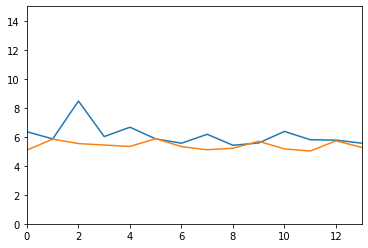

,average_pace
0,5.086922
1,5.838458
2,5.534973
3,5.434403
4,5.335756
5,5.874993
6,5.324498
7,5.109442
8,5.216421
9,5.692257


In [291]:
sum = 0
#sumb = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#ser = pd.Series(sumb)
#sum_series = pd.Series(sumb)
#frame = { 'average_pace': sum_series}
#result = pd.DataFrame(frame)
#np.nansum(vals2)
for i in range(len(nearest_neighbours_id)):
    sum += out[nearest_neighbours_id[i]].average_pace
    #sum = np.nansum([result, out[nearest_neighbours_id[i]].average_pace])

average = sum/(i+1)

frame = { 'average_pace': average}
all_avg = pd.DataFrame(frame)

fig = plt.figure()

for frame in [weekly_user_df, all_avg]:
    plt.plot(frame['average_pace'])

plt.xlim(0,13)
plt.ylim(0,15)
plt.show()

all_avg
#result = ser.add(out[nearest_neighbours_id[4]].average_pace, fill_value=0)
#values = np.array([2, np.nan,4])
#result = np.nansum(values)
#result
#out[nearest_neighbours_id[4]]

Your average pace is:  6.1044207044253 with standard deviation:  0.770416828424922
Other runners average pace is:  5.4017914808649525 with standard deviation:  0.2866765404683031
Consider running slower to stop physical fatigue by pacing yourself


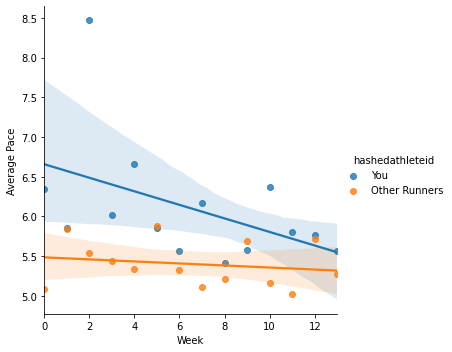

In [292]:
all_avg['hashedathleteid']='Other Runners'
weekly_user_df['hashedathleteid'] = 'You'
all_avg['weeks'] = np.arange(len(all_avg))
weekly_user_df['weeks'] = np.arange(len(weekly_user_df))
#all_avg
graph1= pd.concat([weekly_user_df,all_avg], axis=0, ignore_index=True)

g = sns.lmplot(x="weeks", y="average_pace", hue="hashedathleteid",
               height=5, data= graph1, x_ci="sd")

# Use more informative axis labels than are provided by default
g.set_axis_labels("Week", "Average Pace")


runnersMeanPace = all_avg.average_pace.mean()
yourMeanPace = year_user_df.loc[0,"average_pace"]
print("Your average pace is: ", yourMeanPace, "with standard deviation: ", weekly_user_df.average_pace.std())
print("Other runners average pace is: ", runnersMeanPace, "with standard deviation: ", all_avg.average_pace.std())

if ((weekly_user_df.average_pace.std()- 0.5) > all_avg.average_pace.std()) or ((weekly_user_df.average_pace.std()+0.5) < all_avg.average_pace.std()):
    print("Consider running at a more consistent pace so your body adjusts to it")
if yourMeanPace < runnersMeanPace:
    print("Consider running faster for better ")  
if yourMeanPace > runnersMeanPace:
    print("Consider running slower to stop physical fatigue by pacing yourself")



Your average km is:  14.228554411764707 with standard deviation:  4.719916374713442
Other runners average km is:  12.980391317391604 with standard deviation:  1.6233168045276305
Consider running more consistent distances so your body adjusts to it
Consider running shorter distances to stop physical fatigue


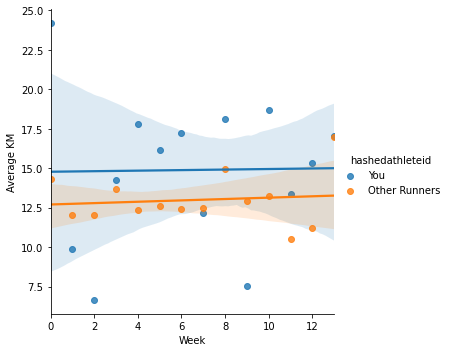

In [293]:
dsum = 0

for d in range(len(nearest_neighbours_id)):
    dsum += out[nearest_neighbours_id[d]].average_km
    
daverage = dsum/(d+1)

d_frame = { 'average_km': daverage}
d_avg = pd.DataFrame(d_frame)

d_avg['hashedathleteid']='Other Runners'
d_avg['weeks'] = np.arange(len(d_avg))
graph2= pd.concat([weekly_user_df,d_avg], axis=0, ignore_index=True)

g2 = sns.lmplot(x="weeks", y="average_km", hue="hashedathleteid",
               height=5, data= graph2, x_ci="sd")

# Use more informative axis labels than are provided by default
g2.set_axis_labels("Week", "Average KM")

runnersMean = d_avg.average_km.mean()
yourMean = year_user_df.loc[0, "average_km"]
print("Your average km is: ", yourMean, "with standard deviation: ", weekly_user_df.average_km.std())
print("Other runners average km is: ", runnersMean, "with standard deviation: ", d_avg.average_km.std())

if ((weekly_user_df.average_km.std()- 1) > d_avg.average_km.std()) or ((weekly_user_df.average_km.std()+1) < d_avg.average_km.std()):
    print("Consider running more consistent distances so your body adjusts to it")
if yourMean < runnersMean:
    print("Consider running longer distances to enhance endurance")  
if yourMean > runnersMean:
    print("Consider running shorter distances to stop physical fatigue")
#year_user_df


Your weekly total distance is:  69.11012142857143 with standard deviation:  20.339037066238244
Other runners weekly total distance is:  61.69695333333334 with standard deviation:  11.932784381785385
Your overall total distance: 967.5417   Other runners overall total distance: 863.7573466666668
Consider running more consistent distances weekly so your body adjusts to it
Consider running shorter distances weekly to stop physical fatigue by pacing yourself
Consider running less for shorter distances overall in the run up to the marathon


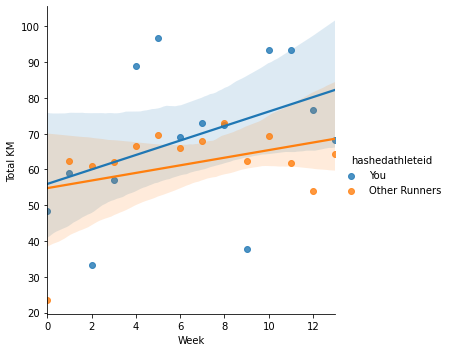

In [294]:
tdsum = 0

for td in range(len(nearest_neighbours_id)):
    tdsum += out[nearest_neighbours_id[td]].total_km
    
tdaverage = tdsum/(td+1)

td_frame = { 'total_km': tdaverage}
td_avg = pd.DataFrame(td_frame)

td_avg['hashedathleteid']='Other Runners'
td_avg['weeks'] = np.arange(len(td_avg))
graph3= pd.concat([weekly_user_df,td_avg], axis=0, ignore_index=True)

g3 = sns.lmplot(x="weeks", y="total_km", hue="hashedathleteid",
               height=5, data= graph3, x_ci="sd")

# Use more informative axis labels than are provided by default
g3.set_axis_labels("Week", "Total KM")

runnersTD = td_avg.total_km.mean()
yourTD = weekly_user_df.total_km.mean()
print("Your weekly total distance is: ", yourTD, "with standard deviation: ", weekly_user_df.total_km.std())
print("Other runners weekly total distance is: ", runnersTD, "with standard deviation: ", td_avg.total_km.std())
print("Your overall total distance:",year_user_df.loc[0,"total_km"], "  Other runners overall total distance:", td_avg.total_km.sum())


if ((weekly_user_df.total_km.std()- 3) > td_avg.total_km.std()) or ((weekly_user_df.total_km.std()+3) < td_avg.total_km.std()):
    print("Consider running more consistent distances weekly so your body adjusts to it")
if yourTD < runnersTD:
    print("Consider running longer distances weekly")  
if yourTD > runnersTD:
    print("Consider running shorter distances weekly to stop physical fatigue by pacing yourself")
if year_user_df.loc[0,"total_km"] < td_avg.total_km.sum():
    print("Consider running more for longer distances in the run up to the marathon")  
if year_user_df.loc[0,"total_km"] > td_avg.total_km.sum():
    print("Consider running less for shorter distances overall in the run up to the marathon")
    

In [295]:
runsum = 0
runsum20 = 0
runsum30 = 0

for rs in range(len(nearest_neighbours_id)):
    runsum += out[nearest_neighbours_id[rs]].num_runs
    runsum20 += out[nearest_neighbours_id[rs]].num_20k
    runsum30 += out[nearest_neighbours_id[rs]].num_30k
    
runaverage = runsum/(rs+1)
runaverage20 = runsum20/(rs+1)
runaverage30 = runsum30/(rs+1)

rs_frame = { 'num_runs': runaverage}
rs_frame20 = { 'num_20k': runaverage20}
rs_frame30 = { 'num_30k': runaverage30}

rs_avg = pd.DataFrame(rs_frame)
rs_avg20 = pd.DataFrame(rs_frame20)
rs_avg30 = pd.DataFrame(rs_frame30)
rs_avg['num_20k'] = rs_avg20
rs_avg['num_30k'] = rs_avg30
rs_avg = rs_avg.round()
#rs_avg['hashedathleteid']='Other Runners'
#rs_avg['weeks'] = np.arange(len(rs_avg))
rs_avg

rs_user = weekly_user_df[["num_runs", "num_20k", "num_30k"]]

wow = rs_avg - rs_user

wow
#graph4= pd.concat([weekly_user_df,rs_avg], axis=0, ignore_index=True)

#g4 = sns.lmplot(x="weeks", y="num_runs", hue="hashedathleteid",
               #height=5, data= graph4, x_ci="sd")

# Use more informative axis labels than are provided by default
#g4.set_axis_labels("Week", "Num Runs")

,num_runs,num_20k,num_30k
0,0.0,0.0,-1.0
1,-1.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,-1.0,-1.0
5,0.0,-1.0,-1.0
6,1.0,-1.0,0.0
7,0.0,0.0,0.0
8,1.0,0.0,-1.0
9,0.0,1.0,0.0


Your average gap is:  32.38805970149254 Hours, with standard deviation:  9.41976929915476
Other runners average gap is:  36.47493487993488 Hours, with standard deviation:  5.186370943818153
Consider running more consistently with fixed gaps
Consider running less frquently to prevent physical fatigue


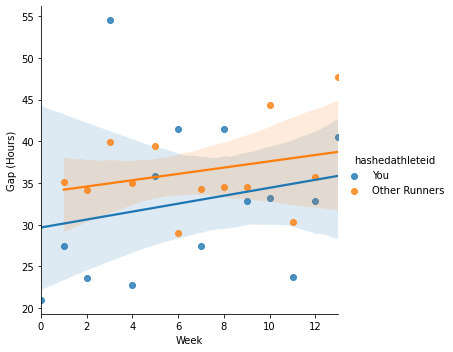

In [296]:
gsum = 0

for gs in range(len(nearest_neighbours_id)):
    gsum += out[nearest_neighbours_id[gs]].gap
    
gaverage = gsum/(gs+1)

gs_frame = { 'gap': gaverage}
gs_avg = pd.DataFrame(gs_frame)

gs_avg['hashedathleteid']='Other Runners'
gs_avg['weeks'] = np.arange(len(gs_avg))
graph5= pd.concat([weekly_user_df,gs_avg], axis=0, ignore_index=True)

g5 = sns.lmplot(x="weeks", y="gap", hue="hashedathleteid",
               height=5, data= graph5, x_ci="sd")

# Use more informative axis labels than are provided by default
g5.set_axis_labels("Week", "Gap (Hours)")

runnersMeanGap = gs_avg.gap.mean()
yourMeanGap = year_user_df.loc[0, "gap"]
print("Your average gap is: ", yourMeanGap, "Hours, with standard deviation: ", weekly_user_df.gap.std())
print("Other runners average gap is: ", runnersMeanGap, "Hours, with standard deviation: ", gs_avg.gap.std())

if ((weekly_user_df.gap.std()- 2) > gs_avg.gap.std()) or ((weekly_user_df.gap.std()+2) < gs_avg.gap.std()):
    print("Consider running more consistently with fixed gaps")
if yourMeanGap > runnersMeanGap:
    print("Consider running more frequently for better perfomance")  
if yourMeanGap < runnersMeanGap:
    print("Consider running less frquently to prevent physical fatigue")

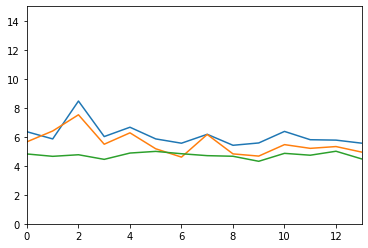

In [297]:
fig = plt.figure()

for frame in [weekly_user_df, out[nearest_neighbours_id[0]], out[nearest_neighbours_id[1]]]:
    plt.plot(frame['average_pace'])

plt.xlim(0,13)
plt.ylim(0,15)
plt.show()

,hashedathleteid,week,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
472,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-07-24,25.7681,1,1,0,25.7681,25.7681,NaN,25.768100,8.121701,3.413955,0.619198,4.684264,NaN
473,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-07-31,81.0648,6,1,0,28.9926,6.9455,8.040878,13.510800,18.687261,3.026502,1.274432,4.782972,28.000000
474,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-08-07,63.0009,5,1,0,21.0969,8.0634,5.079579,12.600180,22.568740,1.977909,1.252905,4.582922,37.400000
475,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-08-14,82.1594,5,1,1,32.2118,8.0626,9.485047,16.431880,17.780428,2.491779,0.968989,4.661661,33.200000
476,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-08-21,88.5880,6,1,0,28.9841,8.0548,8.107571,14.764667,24.467927,1.197824,0.928362,4.641325,27.666667
477,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-08-28,97.1818,6,2,1,32.2120,6.4523,9.451711,16.196967,24.832563,2.213122,1.050960,4.719220,27.333333
478,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-09-04,35.3966,4,0,0,14.5473,4.5173,4.170884,8.849150,15.992033,2.639780,1.012606,4.819168,25.750000
479,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-09-11,87.4925,6,1,1,32.2167,8.0605,9.037078,14.582083,23.264927,2.749024,1.159794,4.745570,37.833333
480,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-09-18,92.7787,6,1,1,35.4147,6.7874,10.332238,15.463117,24.892311,2.492135,1.458326,4.808272,28.333333
481,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-09-25,62.6770,4,1,0,20.7874,8.0570,5.742112,15.669250,24.633133,2.909064,1.460131,4.681614,40.000000


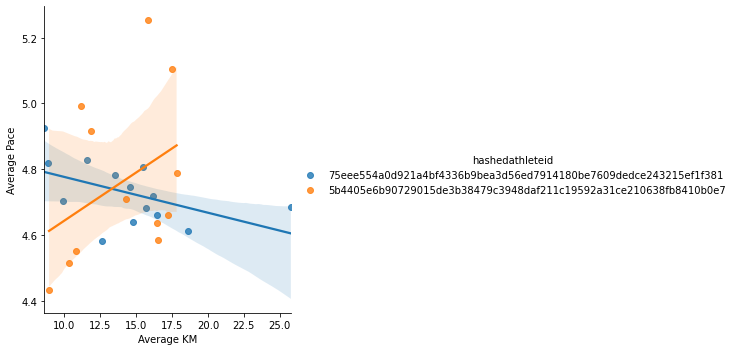

In [298]:
iris = neighbours_weekly.head(26)
g = sns.lmplot(x="average_km", y="average_pace", hue="hashedathleteid",
               height=5, data= iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Average KM", "Average Pace")
iris

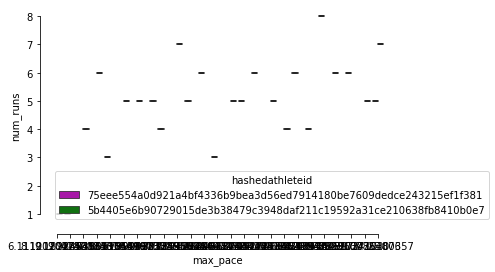

In [299]:
tips = neighbours_weekly.head(26)

sns.boxplot(x="max_pace", y="num_runs",
            hue="hashedathleteid", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

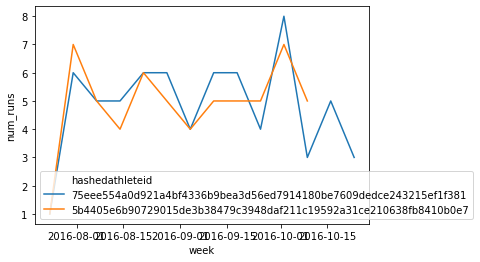

In [300]:
fmri = neighbours_weekly.head(26)
ax = sns.lineplot(x="week", y="num_runs", hue="hashedathleteid",
                  data=fmri)

In [301]:
neighbours_weekly

,hashedathleteid,week,total_km,num_runs,num_20k,num_30k,max_km,min_km,stdv_km,average_km,max_pace,min_pace,stdv_pace,average_pace,gap
472,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-07-24,25.7681,1,1,0,25.7681,25.7681,NaN,25.768100,8.121701,3.413955,0.619198,4.684264,NaN
473,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-07-31,81.0648,6,1,0,28.9926,6.9455,8.040878,13.510800,18.687261,3.026502,1.274432,4.782972,28.000000
474,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-08-07,63.0009,5,1,0,21.0969,8.0634,5.079579,12.600180,22.568740,1.977909,1.252905,4.582922,37.400000
475,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-08-14,82.1594,5,1,1,32.2118,8.0626,9.485047,16.431880,17.780428,2.491779,0.968989,4.661661,33.200000
476,75eee554a0d921a4bf4336b9bea3d56ed7914180be7609...,2016-08-21,88.5880,6,1,0,28.9841,8.0548,8.107571,14.764667,24.467927,1.197824,0.928362,4.641325,27.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-09-25,56.1304,5,1,0,23.3056,5.7050,7.068920,11.226080,24.966428,2.322819,1.920189,5.046718,28.800000
996,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-10-02,59.3362,7,1,0,20.9684,1.8723,6.657680,8.476600,24.107046,1.855327,1.891056,5.312258,26.714286
997,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-10-09,49.4216,7,0,0,12.2784,2.4306,3.668414,7.060229,24.925115,2.161744,1.517879,5.209296,24.857143
998,fc22515fca363d0ffd1d1f6062b4c93f78372443c6f3d6...,2016-10-16,34.9041,4,0,0,11.3708,5.7463,2.336854,8.726025,15.456065,2.505442,1.289594,5.095312,32.250000


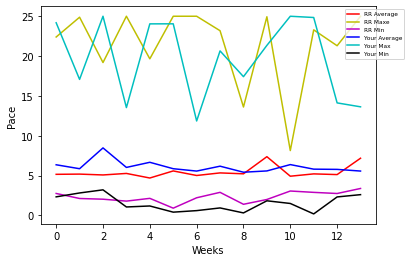

YOU:
Top speed: 25.0 mph, Minumum speed: 0.18 mph, Average Pace: 6.1 mph, with Standard deviation: 0.77
RANDOM RUNNER:
Top speed: 25.0 mph, Minumum speed: 0.9 mph, Average Pace: 5.45 mph, with Standard deviation 0.8


In [302]:
#Picking a random runner
import random
n = random.randint(0,len(nearest_neighbours_id)-1)


figz = plt.figure()

for frame in [out[nearest_neighbours_id[n]]]:
    plt.plot(frame['average_pace'], 'r',label="RR Average")
    plt.plot(frame['max_pace'], 'y',label="RR Maxe")
    plt.plot(frame['min_pace'], 'm', label="RR Min")
    
for frame in [weekly_user_df]:
    plt.plot(frame['average_pace'], 'b',label="Your Average")
    plt.plot(frame['max_pace'], 'c',label="Your Max")
    plt.plot(frame['min_pace'], 'k', label="Your Min")
    

plt.xlabel("Weeks")
plt.ylabel("Pace")
#plt.legend("YYYNNN")
#leg = plt.legend((line1, line2, line3), ('label1', 'label2', 'label3'))
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left', prop=fontP)
#plt.legend()
plt.show()
print("YOU:")
print("Top speed:", round(max(weekly_user_df.max_pace),2),"mph, Minumum speed:", round(min(weekly_user_df.min_pace),2),"mph, Average Pace:", round(weekly_user_df.average_pace.mean(),2), "mph, with Standard deviation:", round(weekly_user_df.average_pace.std(),2))
print("RANDOM RUNNER:")
print("Top speed:", round(max(out[nearest_neighbours_id[n]].max_pace),2),"mph, Minumum speed:", round(min(out[nearest_neighbours_id[n]].min_pace),2),"mph, Average Pace:", round(out[nearest_neighbours_id[n]].average_pace.mean(),2), "mph, with Standard deviation", round(out[nearest_neighbours_id[n]].average_pace.std(),2))


In [303]:
# animals list
animals = ['cat', 'dog', 'rabbit', 'guinea pig']

# Deleting 'fish' element
animals.pop(1)

# Updated animals List
print('Updated animals list: ', animals)

Updated animals list:  ['cat', 'rabbit', 'guinea pig']
